In [1]:
import pandas as pd

city_df = pd.read_csv(r'C:\Users\Frank\Desktop\PCIC\Tercer Semestre\MX_ciudades.csv', header = None, sep = '\t', on_bad_lines = 'skip')
city_df = city_df.rename(columns = {0:"x", 1:"y", 2:"Nombre"})
city_df.head()

,x,y,Nombre
0,0.603244,0.460621,Gustavo A. Madero
1,0.623385,0.569956,San Fernando
2,0.608631,0.646459,Gustavo Díaz Ordaz
3,0.592009,0.290783,Zumpango
4,0.577937,0.172304,Zumpango del Río


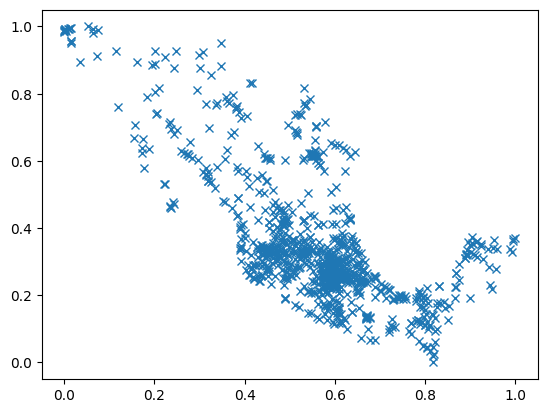

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(city_df["x"], city_df["y"], 'x')

plt.show()

In [5]:
%%time
import math

def distancia(x,y,a,b):
    return round(math.sqrt((x-a)**2 + (y-b)**2), 5)

avg_list = []
max_list = []
max_list_city = []
min_list = []
min_list_city = []
second_min_list = []
segunda_min_city = []

for i in range(len(city_df)):
    #print("Ciudad {}. Nombre: {}". format(i, city_df.iloc[i]["Nombre"]))
    avg_dist = 0
    
    max_val = -10000
    max_index = 0
    
    min_val = 10000
    min_index = 0

    second_min_val = 10000
    second_min_index = 0
    
    for j in range(len(city_df)):
        if j!= i:
            current_dist = distancia(city_df.iloc[i]["x"], city_df.iloc[i]["y"], city_df.iloc[j]["x"], city_df.iloc[j]["y"])
            avg_dist += current_dist
            if current_dist > max_val:
                max_val = current_dist
                max_index = j
            if current_dist < min_val:
                second_min_val = min_val  
                second_min_index = min_index
                min_val = current_dist
                min_index = j
            elif current_dist < second_min_val:
                second_min_val = current_dist
                second_min_index = j

    max_list.append(max_val)
    max_list_city.append(city_df.iloc[max_index]["Nombre"])
    min_list.append(min_val)
    min_list_city.append(city_df.iloc[min_index]["Nombre"])
    second_min_list.append(second_min_val)
    segunda_min_city.append(city_df.iloc[second_min_index]["Nombre"])
    avg_list.append(round(avg_dist/len(city_df), 5))

city_df["Avg Dist"] = avg_list
city_df["Max Dist"] = max_list
city_df["Max Dist City"] = max_list_city
city_df["Min Dist"] = min_list
city_df["Min Dist City"] = min_list_city
city_df["2nd Min Dist"] = second_min_list
city_df["2nd Min Dist City"] = segunda_min_city
city_df.head()

CPU times: total: 2min 40s
Wall time: 2min 43s


,x,y,Nombre,Avg Dist,Max Dist,Max Dist City,Min Dist,Min Dist City,2nd Min Dist,2nd Min Dist City
0,0.603244,0.460621,Gustavo A. Madero,0.24533,0.80357,Tijuana,0.00995,Ciudad Mante,0.01640,Ursulo Galván
1,0.623385,0.569956,San Fernando,0.31938,0.75226,Tijuana,0.04676,Linares,0.04690,Valle Hermoso
2,0.608631,0.646459,Gustavo Díaz Ordaz,0.37229,0.69919,Tijuana,0.00828,Camargo,0.01303,Reynosa
3,0.592009,0.290783,Zumpango,0.18135,0.91762,Tijuana,0.00188,Fraccionamiento la Trinidad,0.00282,Paseos de San Juan
4,0.577937,0.172304,Zumpango del Río,0.23345,1.00303,Tijuana,0.00496,Chichihualco,0.00571,Chilpancingo de los Bravos


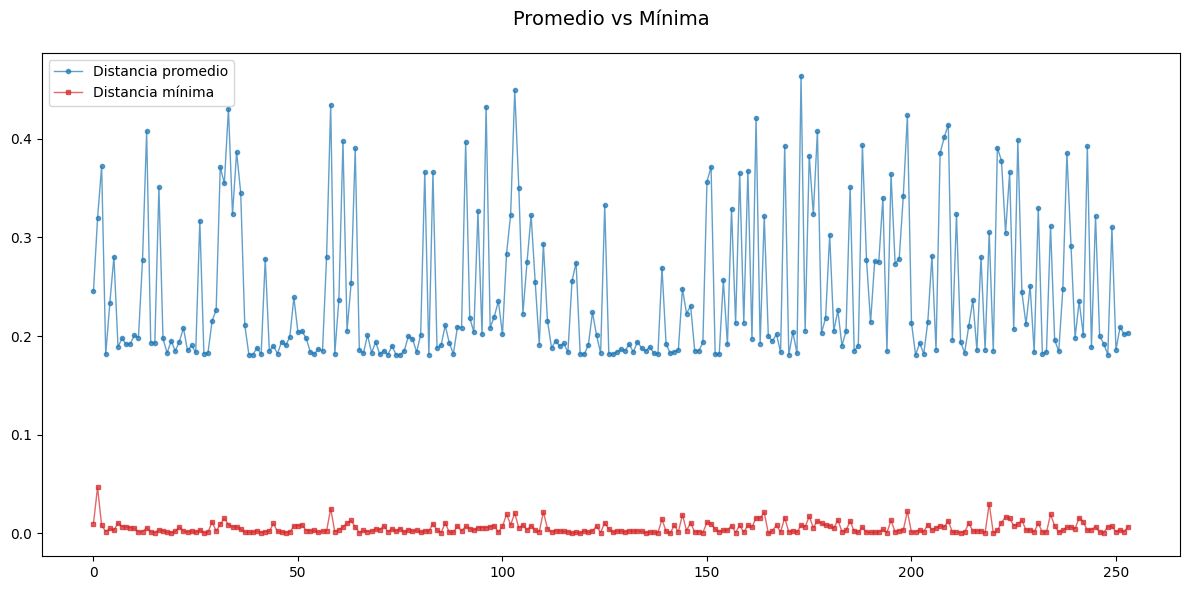

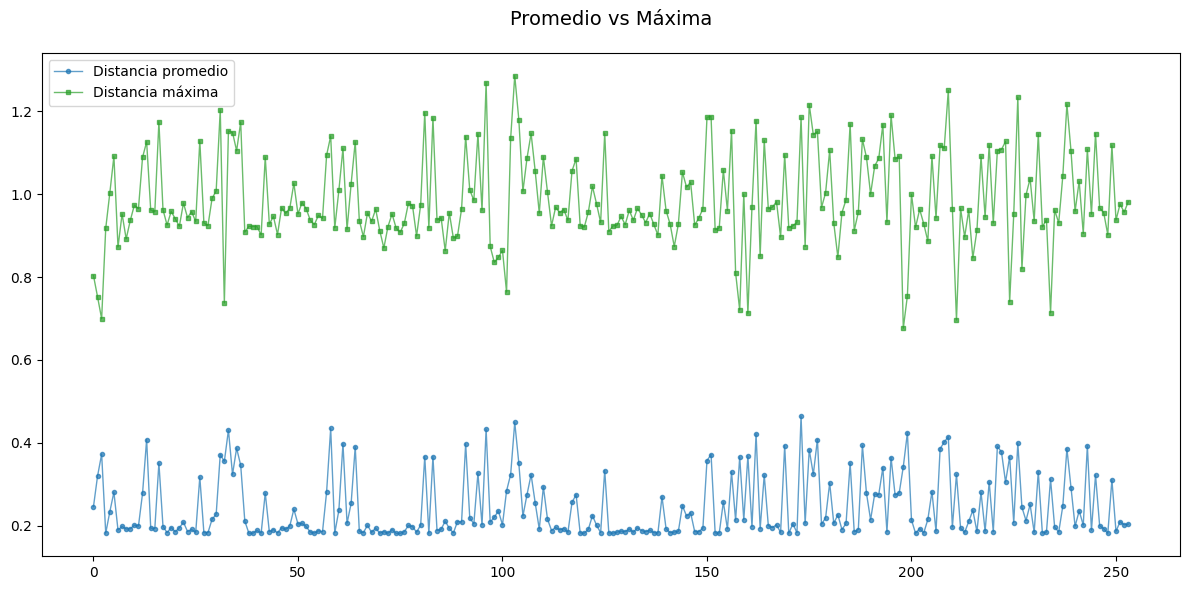

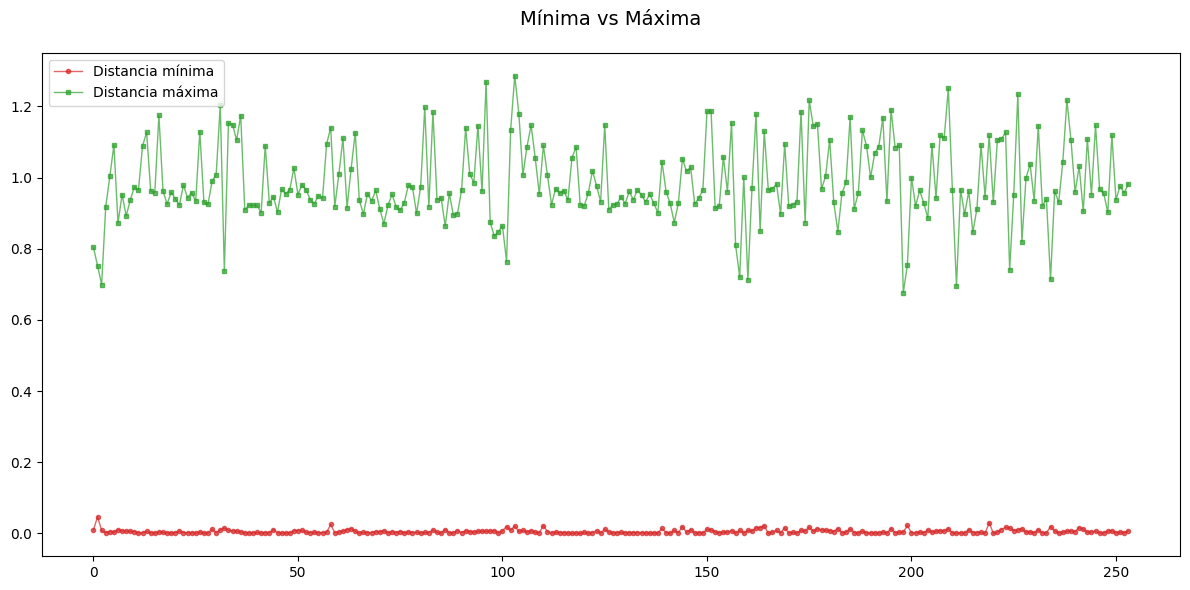

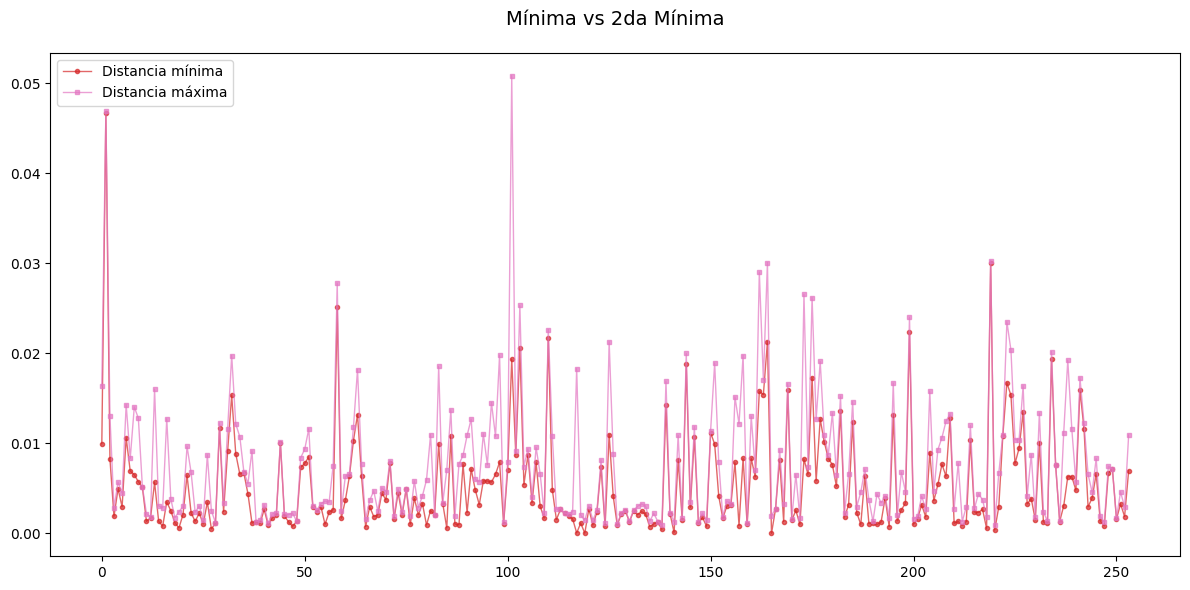

In [6]:
import numpy as np

def plot_two_values(valor1, valor2, texto1, texto2, title, c1, c2):
    cities = np.arange(len(city_df)//4)
    fig, ax = plt.subplots(figsize=(12, 6))
    
    color1 = c1
    color2 = c2
    
    ax.plot(cities, valor1[:len(city_df)//4], color=color1, marker='o', markersize=3, linewidth=1, label=texto1, alpha=0.7)
    ax.plot(cities, valor2[:len(city_df)//4], color=color2, marker='s', markersize=3, linewidth=1, label=texto2, alpha=0.7)
    
    plt.title(title, fontsize=14, pad=20)
    
    lines1, labels1 = ax.get_legend_handles_labels()
    ax.legend(lines1 , labels1 , loc='upper left')
    
    plt.tight_layout()
    plt.show()

avg = city_df["Avg Dist"]
min_d = city_df["Min Dist"]
max_d = city_df["Max Dist"]
min_2nd = city_df["2nd Min Dist"]
plot_two_values(avg, min_d, 'Distancia promedio', 'Distancia mínima', 'Promedio vs Mínima', 'tab:blue', 'tab:red')
plot_two_values(avg, max_d, 'Distancia promedio', 'Distancia máxima', 'Promedio vs Máxima', 'tab:blue', 'tab:green')
plot_two_values(min_d, max_d, 'Distancia mínima', 'Distancia máxima', 'Mínima vs Máxima', 'tab:red', 'tab:green')
plot_two_values(min_d, min_2nd, 'Distancia mínima', 'Distancia máxima', 'Mínima vs 2da Mínima', 'tab:red', 'tab:pink')

In [9]:
print("Promedio: {}. Sigma: {}".format(round(city_df["Min Dist"].mean(), 3), round(city_df["Min Dist"].std(), 3)))

Promedio: 0.006. Sigma: 0.008


In [10]:
print("Promedio: {}. Sigma: {}".format(round(city_df["Max Dist"].mean(), 3), round(city_df["Max Dist"].std(), 3)))

Promedio: 0.923. Sigma: 0.138


In [7]:
city_df["Min Dist City"].value_counts()

Min Dist City
Zapotiltic             5
Santa Anita            5
Ometepec               5
Malinaltepec           5
El Grullo              4
                      ..
Axochiapan             1
Ozumba de Alzate       1
Naucalpan de Juárez    1
Chetumal               1
Reyes Acozac           1
Name: count, Length: 660, dtype: int64

In [8]:
city_df["2nd Min Dist City"].value_counts()

2nd Min Dist City
Venustiano Carranza       7
Loreto                    6
General Escobedo          5
Vicente Guerrero          5
Tuxpan                    5
                         ..
Felipe Carrillo Puerto    1
Catazajá                  1
Santiago Tlacotepec       1
Juárez                    1
San Isidro                1
Name: count, Length: 576, dtype: int64

In [13]:
close_city = set(city_df["Min Dist City"])
second_close_city = set(city_df["2nd Min Dist City"])

intersection = close_city.intersection(second_close_city)
intersection

{'Acacoyagua',
 'Acala',
 'Acaponeta',
 'Acapulco de Juárez',
 'Acatic',
 'Acatzingo de Hidalgo',
 'Acaxochitlán',
 'Acayucan',
 'Acámbaro',
 'Adolfo Ruíz Cortínes',
 'Aguascalientes',
 'Ahualulco de Mercado',
 'Ajijic',
 'Alborada Jaltenco',
 'Aldama',
 'Alfredo V. Bonfil',
 'Allende',
 'Almoloya',
 'Altepexi',
 'Amacuzac',
 'Amozoc de Mota',
 'Angel R. Cabadas',
 'Anáhuac',
 'Apan',
 'Apaseo el Grande',
 'Apatzingán',
 'Arcelia',
 'Ascención',
 'Atencingo',
 'Atitalaquia',
 'Atlacomulco',
 'Atlatlahucan',
 'Atotonilco el Alto',
 'Atoyac de Álvarez',
 'Autlán de Navarro',
 'Axochiapan',
 'Ayotlán',
 'Azcapotzalco',
 'Balancán de Domínguez',
 'Benito Juarez',
 'Benito Juárez',
 'Berriozábal',
 'Buenaventura',
 'Buenos Aires',
 'Cacahoatán',
 'Cacalomacan',
 'Cadereyta de Montes',
 'Calimaya de Díaz González',
 'Calkiní',
 'Calvillo',
 'Cananea',
 'Capulhuac',
 'Carlos A. Carrillo',
 'Casa Blanca',
 'Casimiro Castillo',
 'Catazajá',
 'Centro Familiar la Soledad',
 'Champotón',
 'Chapulh

In [15]:
print("Cantidad de ciudades más cercanas: {}".format(len(close_city)))
print("Cantidad de segundas ciudades más cercanas: {}".format(len(second_close_city)))
print("Intersección: {}".format(len(intersection)))

Cantidad de ciudades más cercanas:  660
Cantidad de segundas ciudades más cercanas: 576
Intersección: 404
